<center><img src="images/header.png"></center>

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>Деревья решений, случайные леса (практика)</center></h2>

**Срок сдачи:** 3 апреля 2017, 06:00 <br> 
**Штраф за опоздание:** -2 балла после 06:00 3 апреля, -4 балла после 06:00 10 апреля, -6 баллов после 06:00 17 апреля

При отправлении ДЗ указывайте фамилию в названии файла<br>

Не забудте создать задание в Slack через /todo.

Используйте данный Ipython Notebook при оформлении домашнего задания.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

# Практика

### Качество вина (10 баллов)

Давайте все-таки разберемся с [вином](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv)!


#### Задание (1 балл)
* Загрузите данные, выполните преобразование целевой переменной: 
    * quality > 5 -> 1
    * quality <= 5 -> 0
* Разделите выборку на обучающую и контрольную в пропорции 80/20

In [2]:
# Your Code Here
data = pd.read_csv('winequality-red.csv', sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data['quality'] = data['quality'].map(lambda x: int(x>5))
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [4]:
p20 = len(data) / 5
data_test = data.loc[:p20]
data_train = data.loc[p20+1:]

In [5]:
data_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,1
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,0


In [6]:
data_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
320,9.8,0.660,0.39,3.20,0.083,21.0,59.0,0.99890,3.37,0.71,11.5,1
321,9.3,0.610,0.26,3.40,0.090,25.0,87.0,0.99975,3.24,0.62,9.7,0
322,7.8,0.620,0.05,2.30,0.079,6.0,18.0,0.99735,3.29,0.63,9.3,0
323,10.3,0.590,0.42,2.80,0.090,35.0,73.0,0.99900,3.28,0.70,9.5,1
324,10.0,0.490,0.20,11.00,0.071,13.0,50.0,1.00150,3.16,0.69,9.2,1
325,10.0,0.490,0.20,11.00,0.071,13.0,50.0,1.00150,3.16,0.69,9.2,1
326,11.6,0.530,0.66,3.65,0.121,6.0,14.0,0.99780,3.05,0.74,11.5,1
327,10.3,0.440,0.50,4.50,0.107,5.0,13.0,0.99800,3.28,0.83,11.5,0
328,13.4,0.270,0.62,2.60,0.082,6.0,21.0,1.00020,3.16,0.67,9.7,1
329,10.7,0.460,0.39,2.00,0.061,7.0,15.0,0.99810,3.18,0.62,9.5,0


In [7]:
data_t = data_train.drop(['quality'], axis=1)
data_c = data_train['quality']
data_train_t = data_train.drop(['quality'], axis=1)
data_train_c = data_train['quality']
data_test_t = data_test.drop(['quality'], axis=1)
data_test_c = data_test['quality']

#### Задание (2 балла)

Сфокусируемся на одном гиперпараметре деревьев решений - максимальной глубине.

Подберите наилучшую глубину `d` дерева с помошью 
* Усредненной оценки качества roc-auc на кросс-валидации при различных `d`
* Валидационных кривых

In [8]:
from sklearn.tree import DecisionTreeClassifier

try:
    from sklearn.model_selection import cross_val_score
except ImportError:
    from sklearn.cross_validation import cross_val_score

try:
    from sklearn.model_selection import validation_curve
except ImportError:
    from sklearn.learning_curve import validation_curve

In [9]:
# Через кросс-валидацию лучшая глубина = 4
for i in xrange(10):
    for i in xrange(1,10):
        model = DecisionTreeClassifier(max_depth=i)
        a = cross_val_score(model, data_train_t, data_train_c, cv=4, scoring='roc_auc')
        if a.mean() > 0.768:
            print i, a.mean()
    print

4 0.77249203201

4 0.77249203201

4 0.77249203201

4 0.77249203201

4 0.769276165072

4 0.77249203201

4 0.77249203201

4 0.769276165072

4 0.769276165072

4 0.769276165072



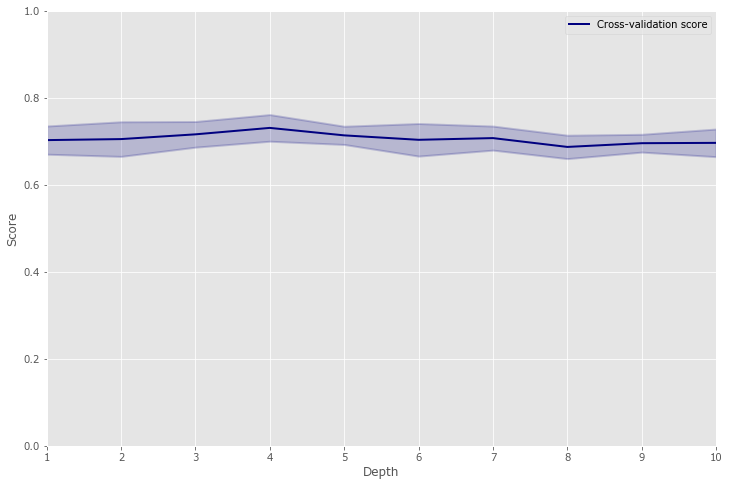

In [10]:
# Аналогично через кривую лучшая глубина = 4
model = DecisionTreeClassifier()
param_range = np.linspace(1, 10, 10)
_, test_scores = validation_curve(model, data_train_t, data_train_c, 
                                  param_name='max_depth', param_range=param_range, cv=4)

test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.xlabel("Depth")
plt.ylabel("Score")
plt.xlim(1, 10)
plt.ylim(0, 1)

plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=2)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=2)
plt.legend(loc="best")
plt.show()

#### Задание (1 балл)

Отсортируйте признаки по важности. Вектор с важностью признаков можно получить с помощью `model.feature_importances_`

In [11]:
model = DecisionTreeClassifier(max_depth=4)
model.fit(data_train_t, data_train_c)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [12]:
q = [(c[0], c[1]) for c in sorted(zip(data_train_t.columns, model.feature_importances_), key=lambda x: x[1], reverse=True)]
col = [c[0] for c in q]
dat = [c[1] for c in q]
pd.DataFrame(data=[dat], columns=col, index=['Feature importance'])

,alcohol,sulphates,volatile acidity,total sulfur dioxide,free sulfur dioxide,chlorides,density,fixed acidity,citric acid,residual sugar,pH
Feature importance,0.532201,0.178959,0.157124,0.046392,0.03998,0.034099,0.011244,0.0,0.0,0.0,0.0


#### Задание (2 балла)
* Получите предсказания на тестовой выборке
* Постройте ROC кривые для обучающей и тестовой выборок
* Посчитайте остальные меры качества классификации при пороге в `0.5`

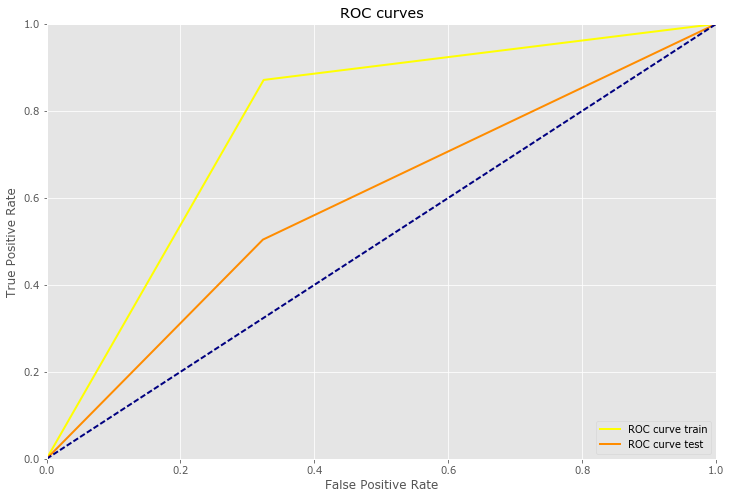

In [30]:
from sklearn.metrics import roc_curve, auc

plt.figure()

data_train_p = model.predict(data_train_t)
fpr_train, tpr_train, thresholds = roc_curve(data_train_c, data_train_p)
# roc_auc  = auc(fpr_train, tpr_train)
plt.plot(fpr_train, tpr_train, color='yellow', lw=2, label='ROC curve train')

data_test_p = model.predict(data_test_t)
fpr_test, tpr_test, thresholds = roc_curve(data_test_c, data_test_p)
# roc_auc  = auc(fpr_test, tpr_test)
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve test')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc="lower right")
plt.show()

In [36]:
def tfpn(y_true, y_pred):
    tp, fp, tn, fn = 0, 0, 0, 0
    for i, j in zip(y_true, y_pred):
        if i == 1 and j == 1:
            tp += 1
        elif i == 0 and j == 1:
            fp += 1
        elif i == 1 and j == 0:
            fn += 1
        else:
            tn += 1
    return (tp, fp, fn, tn)

def tfpn_accuracy(tf):
    return 1.0 * (tf[0]+tf[3])/sum(tf)

def tfpn_recall(tf):
    return 1.0 * tf[0]/(tf[0]+tf[2])

def tfpn_precision(tf):
    return 1.0 * tf[0]/(tf[0]+tf[1])

def affinity(tf):
    return 1.0 * tfpn_precision(tf)/(1.0*(tf[0]+tf[2])/sum(tf))

def round_proba(probas, threshold):
    a = max(probas)
    if a > threshold:
        a = probas.argmax()
    else:
        a = None
    return a

def classifier_probas(probas, threshold=0.5):
    return [round_proba(a, threshold) for a in probas]

In [38]:
# Без порога
tfpn_train = tfpn(data_train_c, data_train_p)
tfpn_test = tfpn(data_test_c, data_test_p)
tr = pd.DataFrame(columns=['accuracy', 'recall', 'precision', 'affinity'], 
                  index=['train', 'test'],
                  data=np.array([tfpn_accuracy(tfpn_train), tfpn_recall(tfpn_train), 
                                 tfpn_precision(tfpn_train), affinity(tfpn_train),
                                 tfpn_accuracy(tfpn_test), tfpn_recall(tfpn_test), 
                                 tfpn_precision(tfpn_test), affinity(tfpn_test),]).reshape(2, 4))
tr

,accuracy,recall,precision,affinity
train,0.787334,0.871233,0.781327,1.368927
test,0.609375,0.504000,0.500000,1.280000


In [46]:
# С порогом
data_train_pr = classifier_probas(model.predict_proba(data_train_t), threshold=0.5)
data_test_pr = classifier_probas(model.predict_proba(data_test_t), threshold=0.5)
tfpn_train = tfpn(data_train_c, data_train_pr)
tfpn_test = tfpn(data_test_c, data_test_pr)
tr = pd.DataFrame(columns=['accuracy', 'recall', 'precision', 'affinity'], 
                  index=['train', 'test'],
                  data=np.array([tfpn_accuracy(tfpn_train), tfpn_recall(tfpn_train), 
                                 tfpn_precision(tfpn_train), affinity(tfpn_train),
                                 tfpn_accuracy(tfpn_test), tfpn_recall(tfpn_test), 
                                 tfpn_precision(tfpn_test), affinity(tfpn_test),]).reshape(2, 4))
tr

,accuracy,recall,precision,affinity
train,0.787334,0.871233,0.781327,1.368927
test,0.609375,0.504000,0.500000,1.280000


#### Задание (1 балл)
Перейдем к модели случайного леса. Зафиксируем некоторую глубину дерева (можно звять оптимальное с предыдущих заданий).

Сравните качество работы 
* Простого дерева решений
* Бэггинга над 10,20,...,100 деревьями решений
* Случайного леса с 10,20,...,100 деревьями решений

Получите график, у которого по оси X откладывается количество деревьев, а по оси Y - качество классификации.

In [47]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [48]:
model = DecisionTreeClassifier(max_depth=4)
param_range = np.linspace(10, 100, 10)

In [49]:
a = BaggingClassifier(base_estimator=model)
a.fit(data_train_t, data_train_c)
data_test_b = a.predict(data_test_t)
tfpn_test = tfpn(data_test_c, data_test_b)
bgg = pd.DataFrame(columns=['accuracy', 'recall', 'precision', 'affinity'], 
                   index=['bagging'],
                   data=np.array([tfpn_accuracy(tfpn_test), tfpn_recall(tfpn_test), 
                                  tfpn_precision(tfpn_test), affinity(tfpn_test)]).reshape(1, 4))

_, test_scores = validation_curve(a, data_train_t, data_train_c, 
                                  param_name='n_estimators', param_range=range(10, 101, 10), cv=4) 
test_scores_mean_1 = np.mean(test_scores, axis=1)
test_scores_std_1 = np.std(test_scores, axis=1)

In [50]:
a = RandomForestClassifier(max_depth=4)
a.fit(data_train_t, data_train_c)
data_test_b = a.predict(data_test_t)
tfpn_test = tfpn(data_test_c, data_test_b)
pd.DataFrame(columns=['accuracy', 'recall', 'precision', 'affinity'], 
             index=['bagging'],
             data=np.array([tfpn_accuracy(tfpn_test), tfpn_recall(tfpn_test), 
                            tfpn_precision(tfpn_test), affinity(tfpn_test)]).reshape(1, 4))

_, test_scores = validation_curve(a, data_train_t, data_train_c, 
                                  param_name='n_estimators', param_range=range(10, 101, 10), cv=4)
test_scores_mean_2 = np.mean(test_scores, axis=1)
test_scores_std_2 = np.std(test_scores, axis=1)

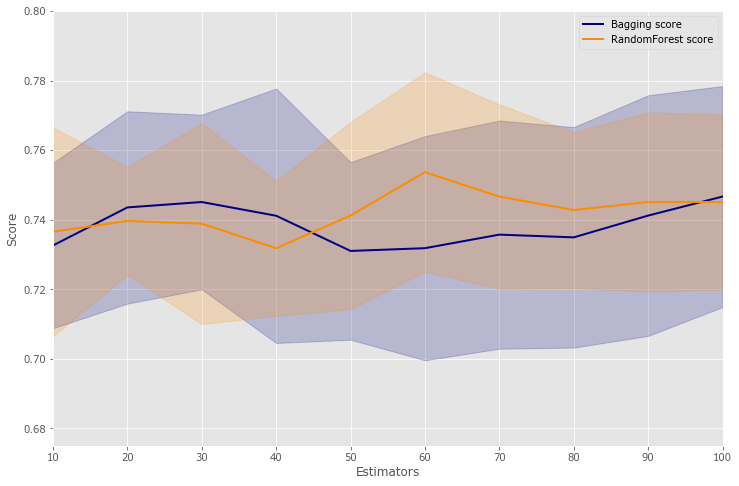

In [162]:
# Запуск 1
plt.xlabel("Estimators")
plt.ylabel("Score")
plt.xlim(10, 100)
plt.ylim(0.675, 0.8)

plt.plot(param_range, test_scores_mean_1, label="Bagging score", color="navy", lw=2)
plt.fill_between(param_range, test_scores_mean_1 - test_scores_std_1,
                 test_scores_mean_1 + test_scores_std_1, alpha=0.2,
                 color="navy", lw=1)
plt.plot(param_range, test_scores_mean_2, label="RandomForest score", color="darkorange", lw=2)
plt.fill_between(param_range, test_scores_mean_2 - test_scores_std_2,
                 test_scores_mean_2 + test_scores_std_2, alpha=0.2,
                 color="darkorange", lw=1)
plt.legend(loc="best")
plt.show()

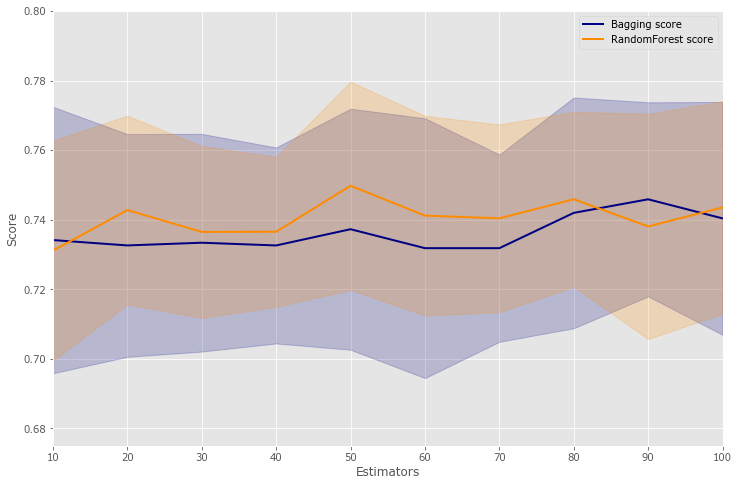

In [168]:
# Запуск 2
plt.xlabel("Estimators")
plt.ylabel("Score")
plt.xlim(10, 100)
plt.ylim(0.675, 0.8)

plt.plot(param_range, test_scores_mean_1, label="Bagging score", color="navy", lw=2)
plt.fill_between(param_range, test_scores_mean_1 - test_scores_std_1,
                 test_scores_mean_1 + test_scores_std_1, alpha=0.2,
                 color="navy", lw=1)
plt.plot(param_range, test_scores_mean_2, label="RandomForest score", color="darkorange", lw=2)
plt.fill_between(param_range, test_scores_mean_2 - test_scores_std_2,
                 test_scores_mean_2 + test_scores_std_2, alpha=0.2,
                 color="darkorange", lw=1)
plt.legend(loc="best")
plt.show()

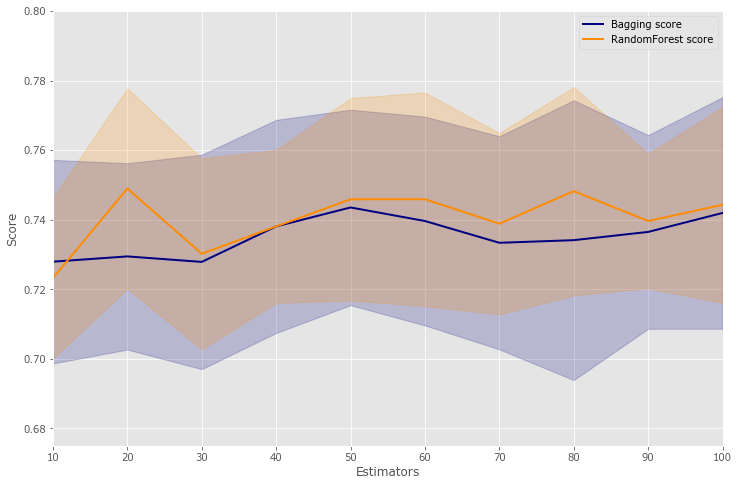

In [173]:
# Запуск 3
plt.xlabel("Estimators")
plt.ylabel("Score")
plt.xlim(10, 100)
plt.ylim(0.675, 0.8)

plt.plot(param_range, test_scores_mean_1, label="Bagging score", color="navy", lw=2)
plt.fill_between(param_range, test_scores_mean_1 - test_scores_std_1,
                 test_scores_mean_1 + test_scores_std_1, alpha=0.2,
                 color="navy", lw=1)
plt.plot(param_range, test_scores_mean_2, label="RandomForest score", color="darkorange", lw=2)
plt.fill_between(param_range, test_scores_mean_2 - test_scores_std_2,
                 test_scores_mean_2 + test_scores_std_2, alpha=0.2,
                 color="darkorange", lw=1)
plt.legend(loc="best")
plt.show()

In [174]:
model = DecisionTreeClassifier(max_depth=4)

a = BaggingClassifier(base_estimator=model)
a.fit(data_train_t, data_train_c)
data_test_b = a.predict(data_test_t)
tfpn_test = tfpn(data_test_c, data_test_b)
bgg = pd.DataFrame(columns=['accuracy', 'recall', 'precision', 'affinity'], 
                   index=['bagging'],
                   data=np.array([tfpn_accuracy(tfpn_test), tfpn_recall(tfpn_test), 
                                  tfpn_precision(tfpn_test), affinity(tfpn_test)]).reshape(1, 4))

a = RandomForestClassifier(max_depth=4)
a.fit(data_train_t, data_train_c)
data_test_b = a.predict(data_test_t)
tfpn_test = tfpn(data_test_c, data_test_b)
rf = pd.DataFrame(columns=['accuracy', 'recall', 'precision', 'affinity'], 
                  index=['random forest'],
                  data=np.array([tfpn_accuracy(tfpn_test), tfpn_recall(tfpn_test), 
                                 tfpn_precision(tfpn_test), affinity(tfpn_test)]).reshape(1, 4))

In [175]:
bgg

,accuracy,recall,precision,affinity
bagging,0.65,0.504,0.557522,1.427257


In [176]:
rf

,accuracy,recall,precision,affinity
random forest,0.6875,0.56,0.608696,1.558261


In [ ]:
# Bagging и случайный лес работают лучше простого дерева по метрике affinity

####  Задание (3 балла)
* С помощью `GridSearchCV` или `RandomSearchCV` подберите наиболее оптимальные параметры для случайного леса.
* Для этих параметров сравните средние результаты по кросс-валидации и качество на контрольной выборке

In [76]:
from sklearn.grid_search import GridSearchCV

model = RandomForestClassifier() 

param_grid = { 
    'n_estimators': range(10, 101, 10),
    'max_depth': range(1, 11)
}

In [103]:
for o in xrange(10):
    CV = GridSearchCV(estimator=model, param_grid=param_grid, cv=4, n_jobs=-1)
    CV.fit(data_train_t, data_train_c)
    print o+1, CV.best_params_, sorted(CV.grid_scores_, key=lambda x: x[1], reverse=True)[0]

1 {'n_estimators': 30, 'max_depth': 7} mean: 0.76075, std: 0.01822, params: {'n_estimators': 30, 'max_depth': 7}
2 {'n_estimators': 30, 'max_depth': 4} mean: 0.75762, std: 0.02213, params: {'n_estimators': 30, 'max_depth': 4}
3 {'n_estimators': 50, 'max_depth': 6} mean: 0.75684, std: 0.02192, params: {'n_estimators': 50, 'max_depth': 6}
4 {'n_estimators': 60, 'max_depth': 5} mean: 0.75371, std: 0.02599, params: {'n_estimators': 60, 'max_depth': 5}
5 {'n_estimators': 80, 'max_depth': 6} mean: 0.75606, std: 0.02451, params: {'n_estimators': 80, 'max_depth': 6}
6 {'n_estimators': 40, 'max_depth': 5} mean: 0.74902, std: 0.02504, params: {'n_estimators': 40, 'max_depth': 5}
7 {'n_estimators': 20, 'max_depth': 5} mean: 0.76310, std: 0.02219, params: {'n_estimators': 20, 'max_depth': 5}
8 {'n_estimators': 30, 'max_depth': 6} mean: 0.75919, std: 0.02155, params: {'n_estimators': 30, 'max_depth': 6}
9 {'n_estimators': 70, 'max_depth': 10} mean: 0.75762, std: 0.01730, params: {'n_estimators': 70

In [105]:
a = [(0.76075, 0.01822, {'n_estimators': 30, 'max_depth': 7}),
(0.75762, 0.02213, {'n_estimators': 30, 'max_depth': 4}),
(0.75684, 0.02192, {'n_estimators': 50, 'max_depth': 6}),
(0.75371, 0.02599, {'n_estimators': 60, 'max_depth': 5}),
(0.75606, 0.02451, {'n_estimators': 80, 'max_depth': 6}),
(0.74902, 0.02504, {'n_estimators': 40, 'max_depth': 5}),
(0.76310, 0.02219, {'n_estimators': 20, 'max_depth': 5}),
(0.75919, 0.02155, {'n_estimators': 30, 'max_depth': 6}),
(0.75762, 0.01730, {'n_estimators': 70, 'max_depth': 10}),
(0.75293, 0.02813, {'n_estimators': 50, 'max_depth': 5})]
for i in sorted(a, key=lambda x: x[0], reverse=True):
    print i[2]

{'n_estimators': 20, 'max_depth': 5}
{'n_estimators': 30, 'max_depth': 7}
{'n_estimators': 30, 'max_depth': 6}
{'n_estimators': 30, 'max_depth': 4}
{'n_estimators': 70, 'max_depth': 10}
{'n_estimators': 50, 'max_depth': 6}
{'n_estimators': 80, 'max_depth': 6}
{'n_estimators': 60, 'max_depth': 5}
{'n_estimators': 50, 'max_depth': 5}
{'n_estimators': 40, 'max_depth': 5}


In [110]:
# Возьмем число деревьев 30 и вновь проведем эксперимент
model = RandomForestClassifier(n_estimators=30) 

param_grid = { 
    'max_depth': range(1, 11)
}
for o in xrange(10):
    CV = GridSearchCV(estimator=model, param_grid=param_grid, cv=4, n_jobs=-1)
    CV.fit(data_train_t, data_train_c)
    print o+1, CV.best_params_, sorted(CV.grid_scores_, key=lambda x: x[1], reverse=True)[0]

1 {'max_depth': 5} mean: 0.74511, std: 0.02365, params: {'max_depth': 5}
2 {'max_depth': 10} mean: 0.74042, std: 0.01795, params: {'max_depth': 10}
3 {'max_depth': 4} mean: 0.74590, std: 0.02461, params: {'max_depth': 4}
4 {'max_depth': 7} mean: 0.74824, std: 0.02249, params: {'max_depth': 7}
5 {'max_depth': 5} mean: 0.74668, std: 0.02443, params: {'max_depth': 5}
6 {'max_depth': 5} mean: 0.74980, std: 0.01877, params: {'max_depth': 5}
7 {'max_depth': 6} mean: 0.74980, std: 0.02005, params: {'max_depth': 6}
8 {'max_depth': 6} mean: 0.74824, std: 0.02880, params: {'max_depth': 6}
9 {'max_depth': 5} mean: 0.75684, std: 0.02749, params: {'max_depth': 5}
10 {'max_depth': 4} mean: 0.74980, std: 0.02858, params: {'max_depth': 4}


In [112]:
a = [(0.74511, 0.02365, {'max_depth': 5}),
(0.74042, 0.01795, {'max_depth': 10}),
(0.74590, 0.02461, {'max_depth': 4}),
(0.74824, 0.02249, {'max_depth': 7}),
(0.74668, 0.02443, {'max_depth': 5}),
(0.74980, 0.01877, {'max_depth': 5}),
(0.74980, 0.02005, {'max_depth': 6}),
(0.74824, 0.02880, {'max_depth': 6}),
(0.75684, 0.02749, {'max_depth': 5}),
(0.74980, 0.02858, {'max_depth': 4})]
for i in sorted(a, key=lambda x: x[0], reverse=True):
    print i[2]

{'max_depth': 5}
{'max_depth': 5}
{'max_depth': 6}
{'max_depth': 4}
{'max_depth': 7}
{'max_depth': 6}
{'max_depth': 5}
{'max_depth': 4}
{'max_depth': 5}
{'max_depth': 10}


In [113]:
# Используем высоту дерева = 5
model = RandomForestClassifier(max_depth=5, n_estimators=30)
a = cross_val_score(model, data_train_t, data_train_c, cv=4, scoring='roc_auc')

In [115]:
# Результаты лучше, чем на одном дереве или при бэггинге и на случайном лесе в прошлых экспериментах (везде результат <0.8)
a.mean()

0.82736607267721518

In [118]:
# affinity также лучше при таких параметрах, чем при любом выше проведенном эксперименте
model.fit(data_train_t, data_train_c)
data_test_b = model.predict(data_test_t)
tfpn_test = tfpn(data_test_c, data_test_b)
rf = pd.DataFrame(columns=['accuracy', 'recall', 'precision', 'affinity'], 
                  index=['random forest'],
                  data=np.array([tfpn_accuracy(tfpn_test), tfpn_recall(tfpn_test), 
                                 tfpn_precision(tfpn_test), affinity(tfpn_test)]).reshape(1, 4))
rf

,accuracy,recall,precision,affinity
random forest,0.73125,0.52,0.714286,1.828571
